![header](header.png)

# Procesamiento Digital de Señales en Sistemas Embebidos

---

# Actividad: Correlación
## Introducción
En general, la correlación describe la relación mutua que existe entre dos o más cosas. La misma definición es válida incluso en el caso de las señales. Es decir, la correlación entre señales indica la medida en que la señal dada se parece a otra señal.
Dependiendo de si las señales consideradas para la correlación son iguales o diferentes, tenemos dos tipos de correlación: autocorrelación y correlación cruzada.
En la Autocorrelación la señal dada se correlaciona consigo misma, generalmente la versión de sí misma desplazada en el tiempo. La expresión matemática para la autocorrelación de la señal de tiempo continuo x (t) viene dada por

$$R_{xx}[m] =  \sum_{n=0}^{N-1} x_n.x_{n-m} $$


En el caso de la Correlación Cruzada la señal de interés se correlaciona con otra señal para saber cuánto semejanza existe entre ellos. La expresión matemática para la correlación cruzada de señales de tiempo continuas x (t) e y (t) viene dada por


$$R_{xy}[m] =  \sum_{n=0}^{N-1} x_n.y_{n-m} $$



## Ejemplo de Aplicación
Anemómetro es cualquier dispositivo que se utiliza para medir la velocidad y dirección del viento. Comúnmente se utilizan
anemómetros mecánicos consistentes en paletas en forma de copa que les permiten girar a una velocidad proporcional
a la velocidad del viento. Debido a las piezas móviles, este tipo de anemómetros es más susceptible al desgaste, y por lo tanto la pérdida de precisión. Otro tipo de dispositivo de medición de la velocidad del viento es el "anemómetro ultrasónico", que utiliza el concepto de tiempo de vuelo (TOF) para medir la velocidad y dirección del viento. Comparado con anemómetros mecánicos tipo copa tradicionales, los anemómetros ultrasónicos tienen alta precisión y sin desgaste. Los anemómetros ultrasónicos pueden ser unidimensionales, bidimensionales y tridimensionales y emplean ondas de sonido con frecuencia superior a 20kHz para trabajar eficientemente.
El concepto de trabajo detrás de un anemómetro ultrasónico es muy simple y se basa en el concepto de
velocidad relativa, es decir, la velocidad del sonido que viaja en la dirección del viento viajará más rápido, por lo tanto, menos TOF y viceversa
viceversa


<img src="dot.png" alt="dot"  align="center" width="30%" heigth="30%" title="Dot">


In [1]:
# Incluir librerías
import numpy as np
import process_data
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix

## Se carga el dataset de señales

In [7]:
#%% Lectura del dataset

N = 12
folder = 'dataset_acordes' # Carpeta donde se almacenan los .csv

#Procesamos los archivos para obtener el dataset junto con el diccionario de clases
dataset, classmap = process_data.process_data(folder)

#Separamos el dataset del vector con la información que codifica la clase
X, y = dataset[:, :-1], dataset[:, -1]

#Contamos el número de tonos para cada clase
count = np.unique(y, return_counts=True)
pos = np.ones(len(count[0])+1)
pos[0] = 0

#Matriz de ceros que luego se irán reemlpazando con valores del producto punto
dot_prod = np.zeros((len(dataset[:,0]),len(count[0])))

#Se arma vector que permite graficar cada tono en un Heatmap independiente
for i in range(len(count[0])):
    pos[i+1] =  pos[i] + count[1][i]

#Lista con las clases     
key_list = list(classmap.keys())

dataset_acordes\DO.csv
Se encontraron 84 eventos de la clase:  DO
dataset_acordes\FA.csv
Se encontraron 45 eventos de la clase:  FA
dataset_acordes\RE.csv
Se encontraron 58 eventos de la clase:  RE
dataset_acordes\SOL.csv
Se encontraron 95 eventos de la clase:  SOL


### Plantillas para la comparación

In [3]:
notes= {'DO' : [1,0,0,0,1,0,0,1,0,0,0,0],
        'FA' : [1,0,0,0,0,1,0,0,0,1,0,0],
        'RE' : [0,0,1,0,0,0,1,0,0,1,0,0],
        'SOL' : [0,0,1,0,0,0,0,1,0,0,0,1]}

### Graficación de los coeficientes PCP para los distintos acordes

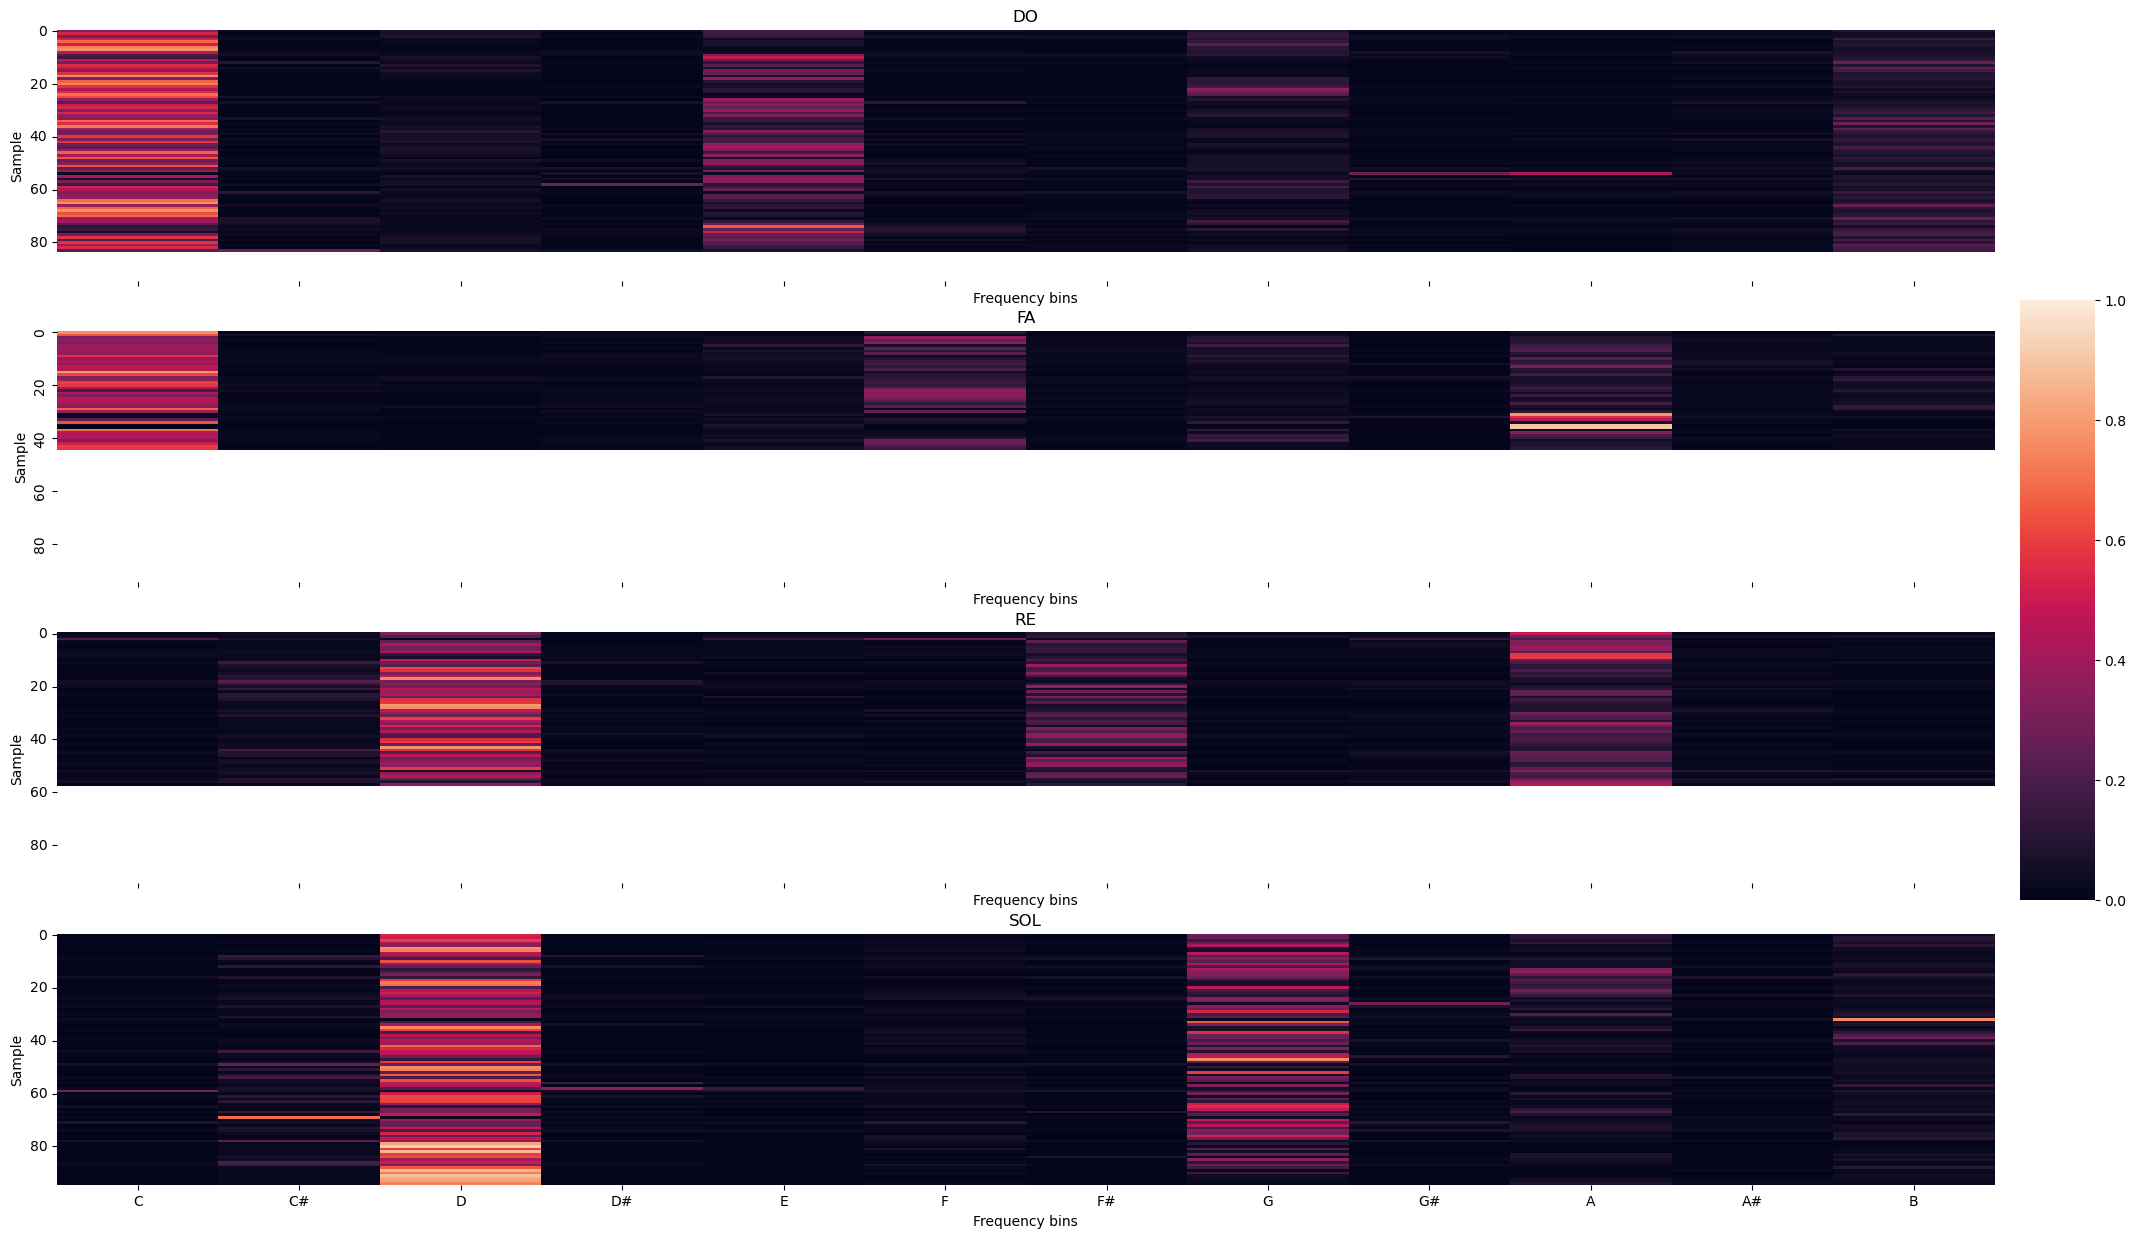

In [4]:
fig, axn = plt.subplots( len(count[0]),1, sharex=True, sharey=True)
cbar_ax = fig.add_axes([.91, .3, .03, .4])

#fig.set_figwidth(25)
values = ['C','C#','D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
for i, ax in enumerate(axn.flat):
    sns.heatmap(X[int(pos[i]):int(pos[i+1])], ax=ax, cbar=i == 0, vmin=0, vmax=1, cbar_ax=None if i else cbar_ax)
    ax.set_title(classmap[i])
    ax.set(xlabel = "Frequency bins")
    ax.set_xticklabels(values)
    ax.set(ylabel = "Sample")
fig.set_figheight(15)   
fig.set_figwidth(25)   
plt.show()

### Cálculo del producto punto entre señales del Dataset y las plantillas

In [5]:
threshold = 0.75 
TP = 0
FP = 0
TN = 0
FN = 0
not_recon = 0
confusion_mat = np.zeros((len(classmap),len(classmap)))
for i in range(len(dataset[:,0])):    
    for j in range(len(classmap)):
        dot_prod[i][j] = np.dot(notes[classmap[j]], X[i])
        #dot_prod[i][j] = np.dot(prom[j][:], X[i])
        if (np.dot(notes[classmap[j]], X[i]) > threshold):
            if(key_list[j] == y[i]):
                #print("Dot product: {:.2f} > {} True Positive, track {}, chord {}".format( dot_prod[i][j],threshold, i, j))
                TP = TP + 1 
                confusion_mat[int(y[i]),int(key_list[j])] = confusion_mat[int(y[i]),int(key_list[j])] + 1
            else:
                #print("Dot product: {:.2f} > {} False Positive, track {}, chord {}, should be {}".format(  dot_prod[i][j],threshold,i, j, y[i]))
                FP = FP + 1 
                confusion_mat[int(y[i]),int(key_list[j])] = confusion_mat[int(y[i]),int(key_list[j])] + 1
        else:
            if(key_list[j] == y[i]):
                #print("Dot product: {:.2f} < {} False Negative, track {}, chord {}".format( dot_prod[i][j],threshold, i, j))
                TN = TN + 1 
            else:
                #print("Dot product: {:.2f} < {} True Negative, track {}, chord {}, it's {}".format( dot_prod[i][j],threshold, i, j, y[i]))
                FN = FN + 1 

### Gráficas del resultado del producto punto para todo el dataset con las plantillas

Precisión 82.72%
Sensibilidad 16.27%


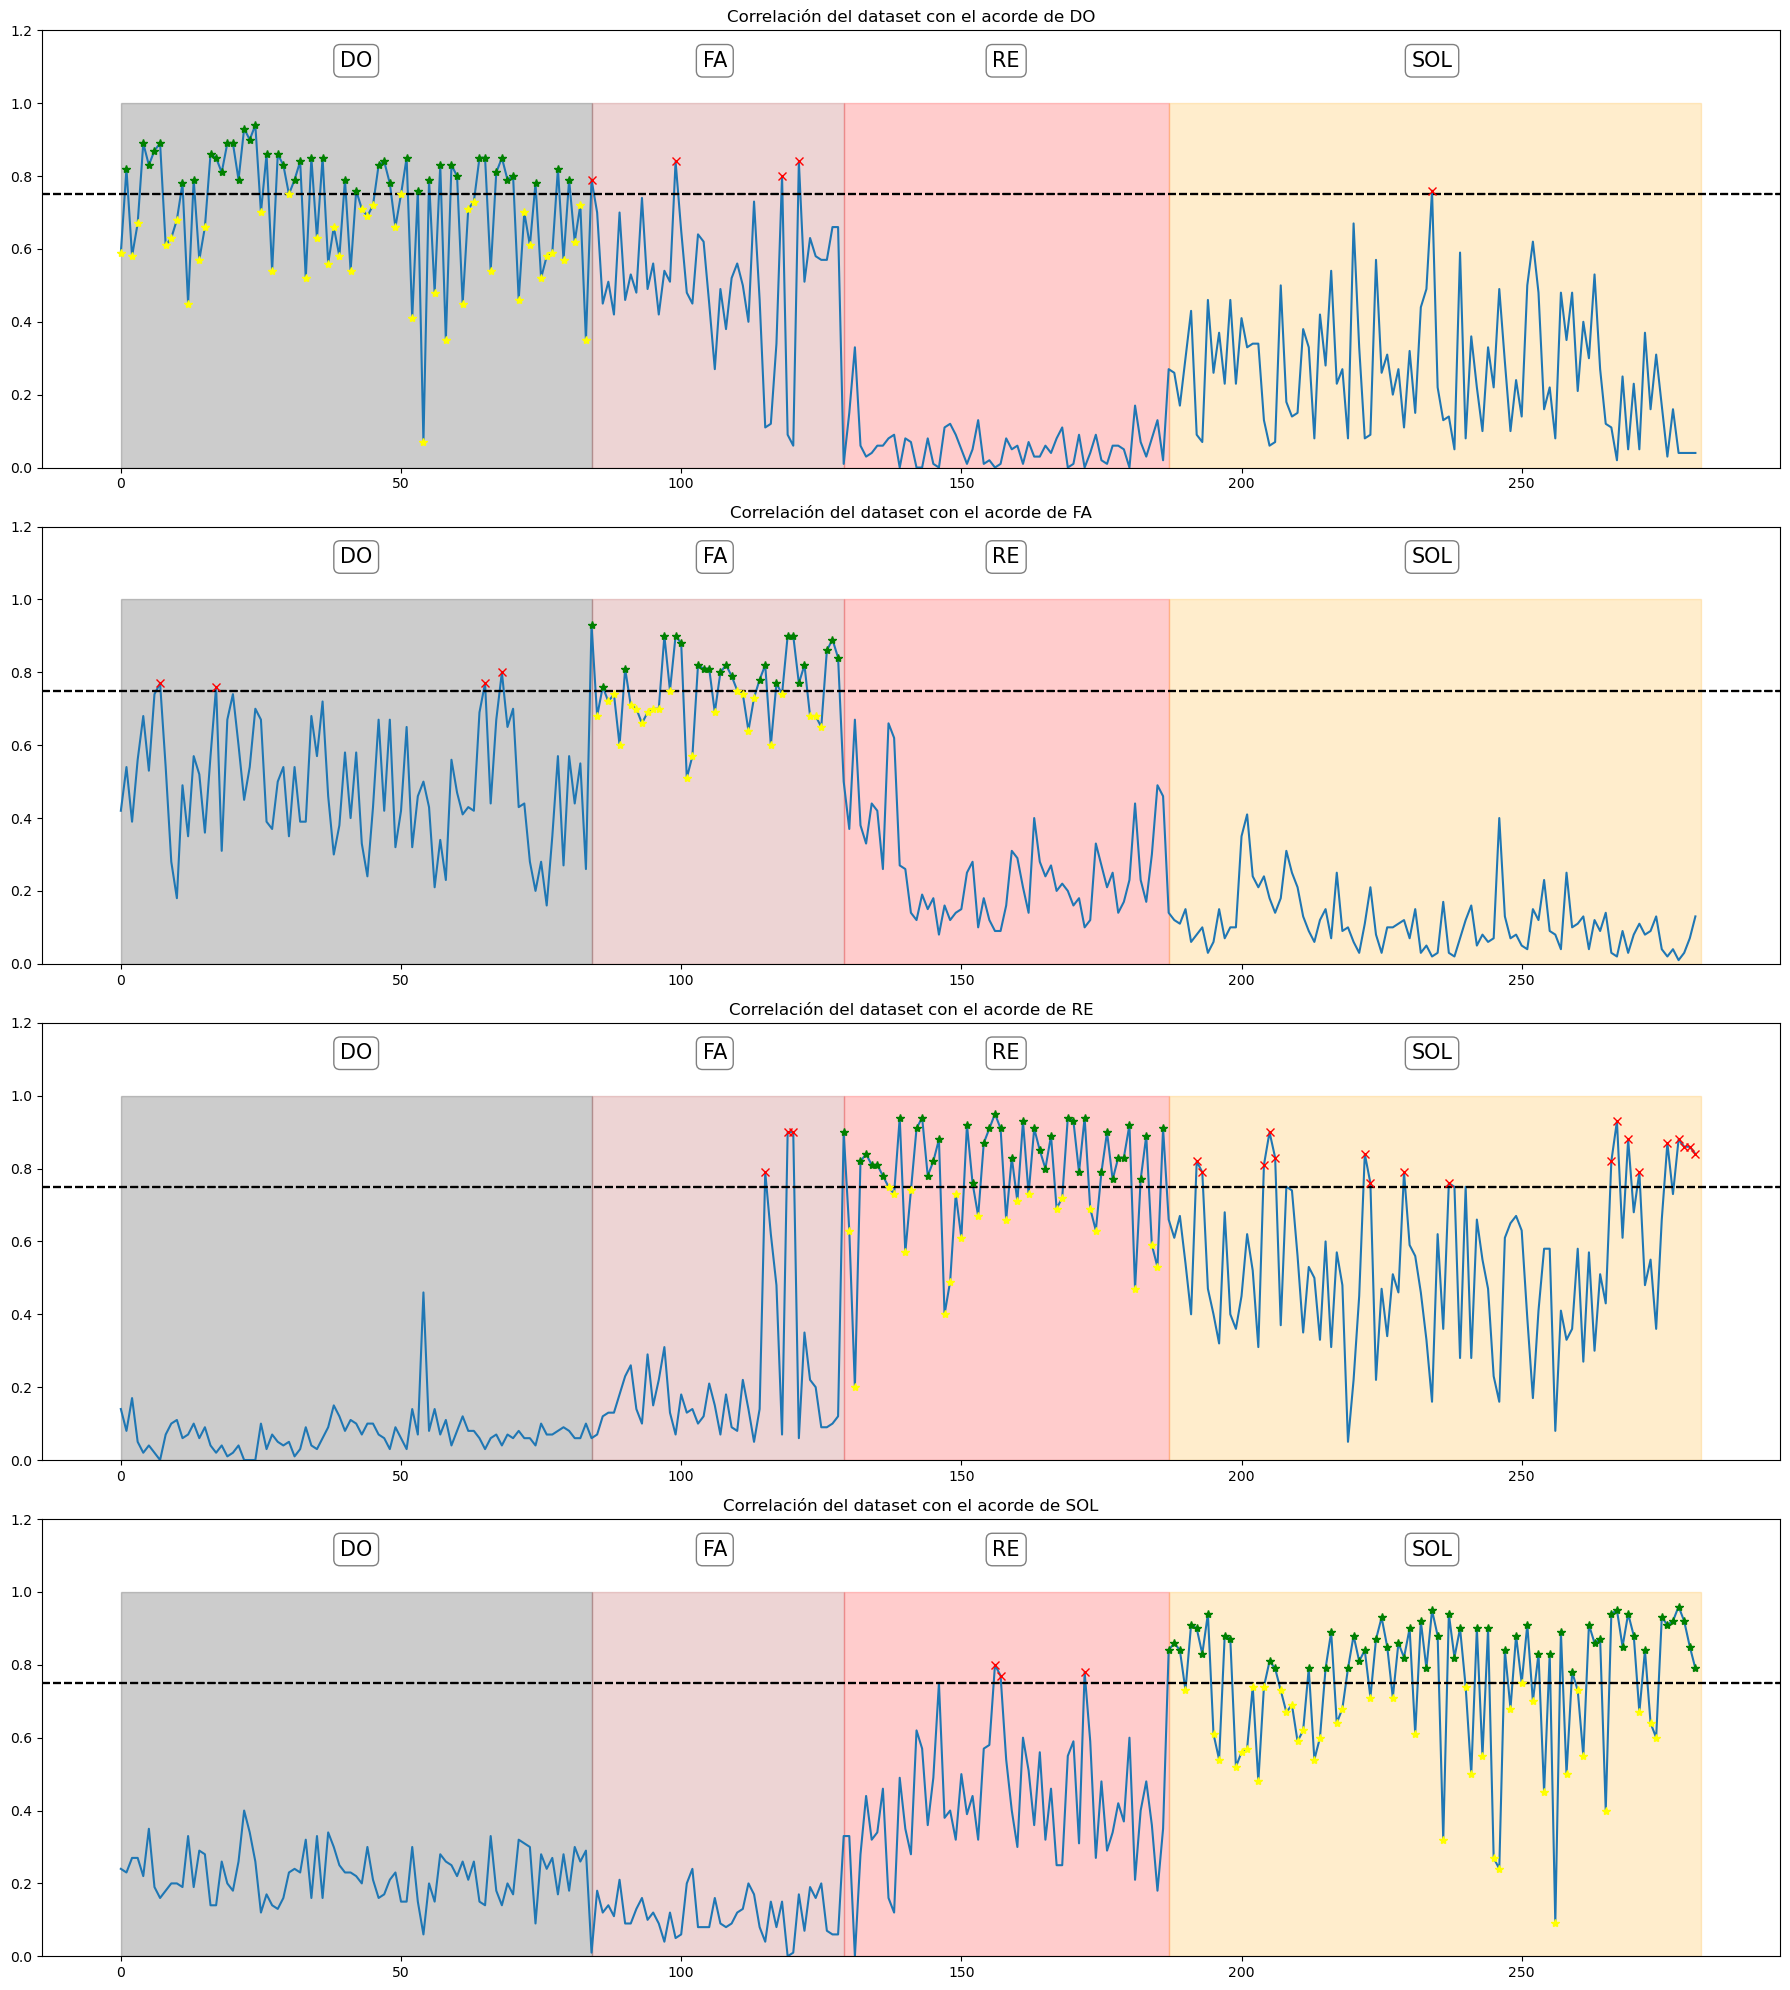

In [6]:
fig2, axes = plt.subplots(len(dot_prod[0]), 1, figsize=(20, 20))
fig2.subplots_adjust(hspace=0.5)   
colores = ['black', 'brown', 'red', 'orange',]
for chord in range(len(dot_prod[0])):                           
       axes[chord].set_title('Correlación del dataset con el acorde de ' + classmap[chord])
       axes[chord].plot(dot_prod[:,chord])
       for i in range(len(pos)-1): 
            axes[chord].axhline(y=threshold, color='black', linestyle ="--")
            axes[chord].add_patch(plt.Rectangle((pos[i], 0), pos[i+1]-pos[i], 1, color=colores[i], alpha=0.2))
            axes[chord].text((int((pos[i+1]-pos[i])/2+pos[i])), 1.1, f'{classmap[i]}', fontsize=15, horizontalalignment='center',bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))     
for i in range(len(dataset[:,0])):    
    for j in range(len(classmap)):
        axes[j].set_ylim(0,1.2)
        if (np.dot(notes[classmap[j]], X[i]) > threshold):
            if(key_list[j] == y[i]):
               axes[j].plot(i, dot_prod[i,j], '*', color = 'green')
            else:
               axes[j].plot(i, dot_prod[i,j], 'x', color = 'red')
        else:
            if(key_list[j] == y[i]):
               axes[j].plot(i, dot_prod[i,j], '*', color = 'yellow')
#axes[0].legend()
print("Precisión {:.2f}%".format((TP/(TP+FP))*100))  
print("Sensibilidad {:.2f}%".format((TP/(TP+FN))*100)) 
fig2.tight_layout(rect=[0,0,0.9,1])   
plt.show()

### Obtención de la Matriz de confusión

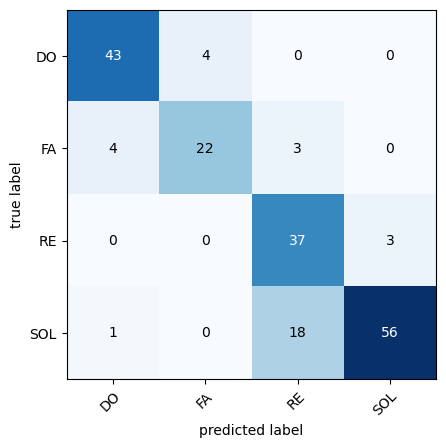

In [10]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_mat,
                                class_names=list(classmap.values()))
plt.show()